In [17]:
import pandas as pd
pd.set_option ('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/datos_unidos.csv")

In [3]:
df.shape

(50116, 20)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 50116 entries, 0 to 50115
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50116 non-null  int64  
 1   pais                     50116 non-null  str    
 2   edad                     50116 non-null  int64  
 3   año_nacimiento           50116 non-null  int64  
 4   sexo                     50116 non-null  str    
 5   años_educacion           50116 non-null  int64  
 6   estado_marital           50116 non-null  int64  
 7   decil_ingresos           39688 non-null  float64
 8   satisfaccion_vida        49752 non-null  float64
 9   felicidad                49897 non-null  float64
 10  reuniones_sociales       49981 non-null  float64
 11  deporte                  49333 non-null  float64
 12  horas_trabajo            50105 non-null  float64
 13  problemas_sueño          50116 non-null  int64  
 14  interes_politica         50116 no

In [6]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50116.0,78150.556589,38146.018647,50002.0,60020.0,69947.5,80048.0,273842.0
edad,50116.0,59.023126,85.610075,15.0,37.0,53.0,67.0,999.0
año_nacimiento,50116.0,2019.042142,533.511984,1933.0,1957.0,1971.0,1987.0,9999.0
años_educacion,50116.0,14.542601,10.397933,0.0,11.0,13.0,16.0,99.0
estado_marital,50116.0,35.021909,31.004102,1.0,6.0,6.0,66.0,99.0
decil_ingresos,39688.0,5.404026,2.752342,1.0,3.0,5.0,8.0,10.0
satisfaccion_vida,49752.0,6.995679,2.152700,0.0,6.0,7.0,8.0,10.0
felicidad,49897.0,7.314548,1.912394,0.0,6.0,8.0,9.0,10.0
reuniones_sociales,49981.0,4.763170,1.600793,1.0,4.0,5.0,6.0,7.0
deporte,49333.0,3.225306,2.624059,0.0,1.0,3.0,6.0,7.0


Como vemos en la tabla, hay algunas columnas que tienen caracteres raros (99,999,66), que hay tenemos que pasar a nulos cuando hagamos la limpieza. a continuación, veremos las gráficas tanto de columnas numéricas como de tipo object para analizar un poco más con que vamos a trabajar.

In [10]:
numeric_cols = df.select_dtypes(include="number").columns

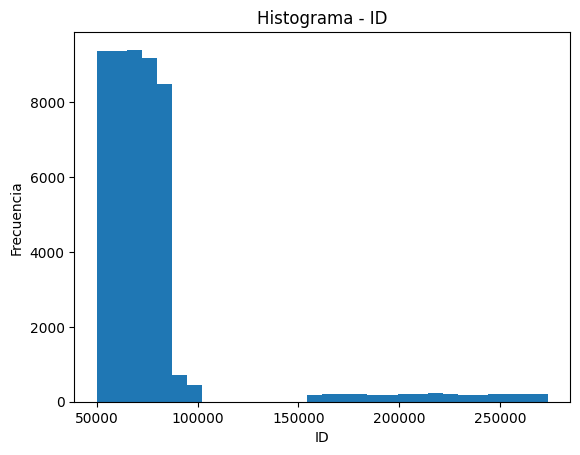

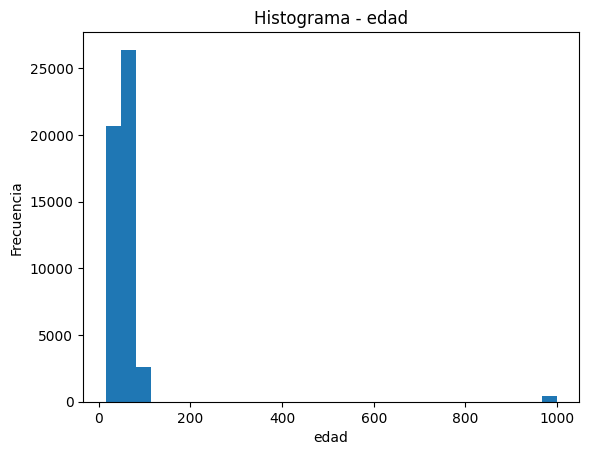

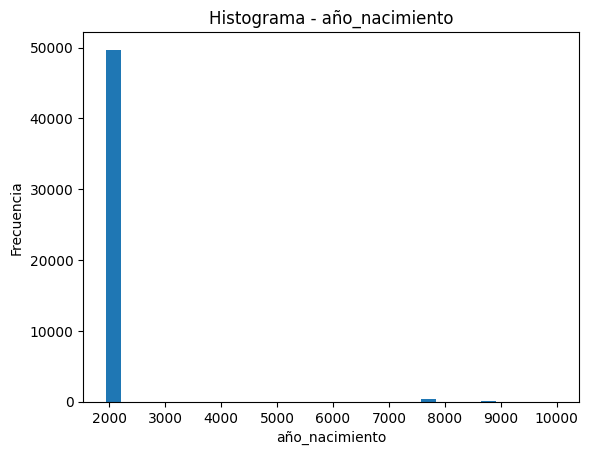

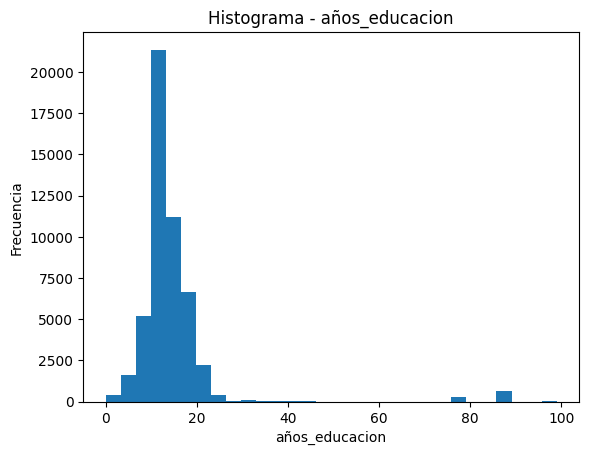

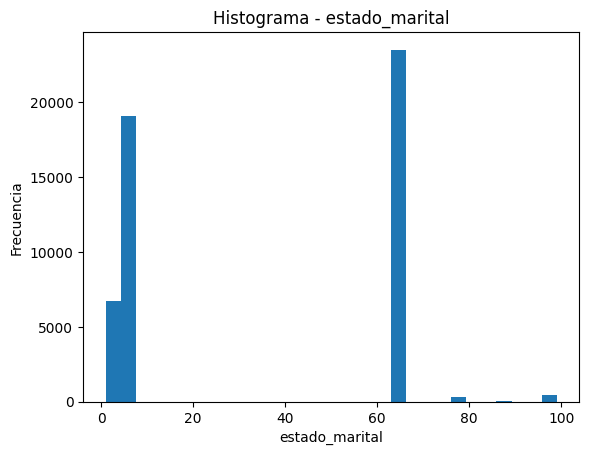

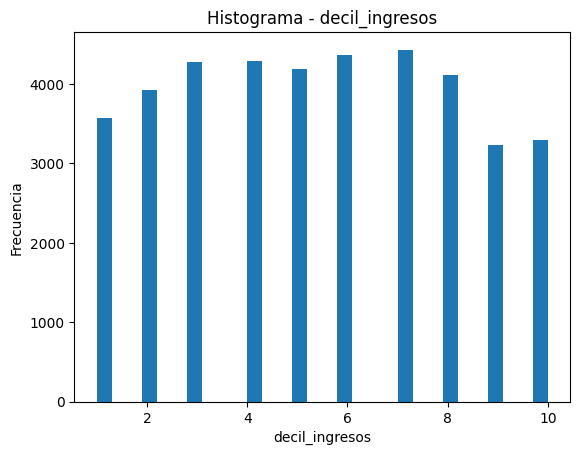

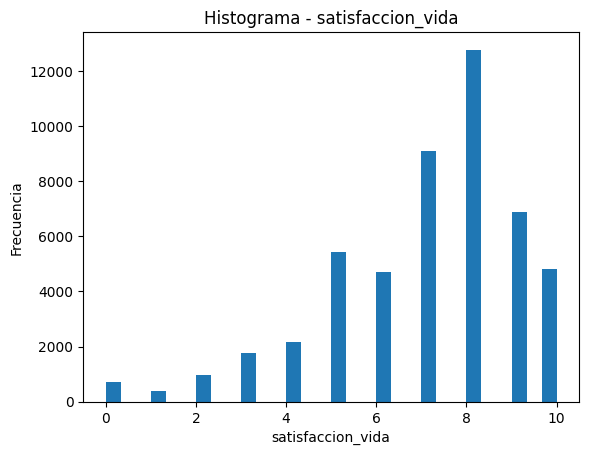

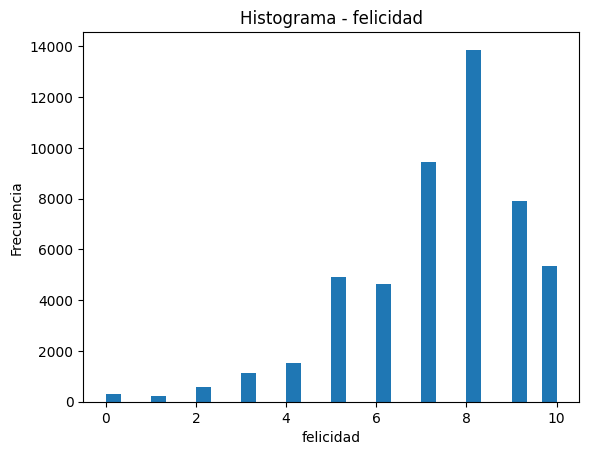

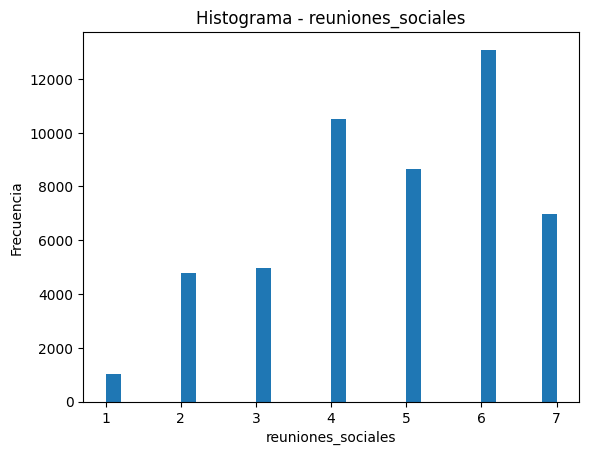

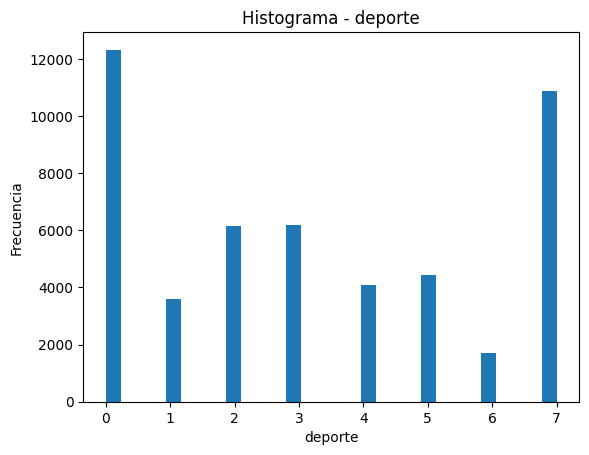

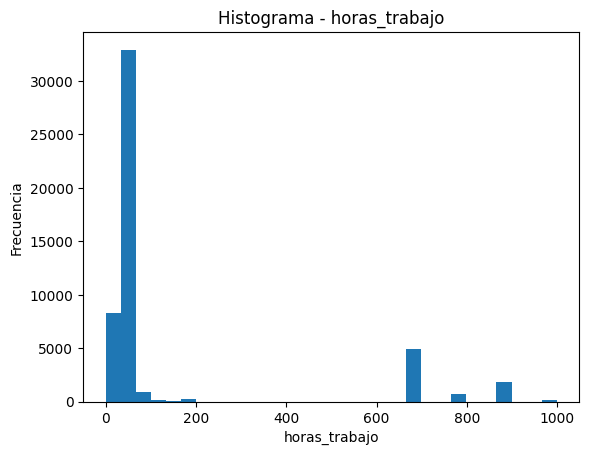

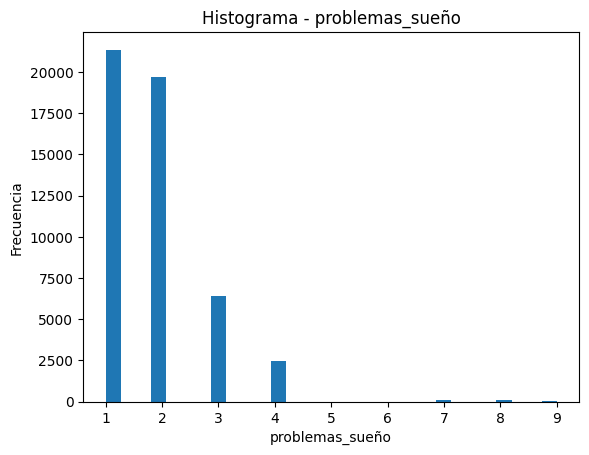

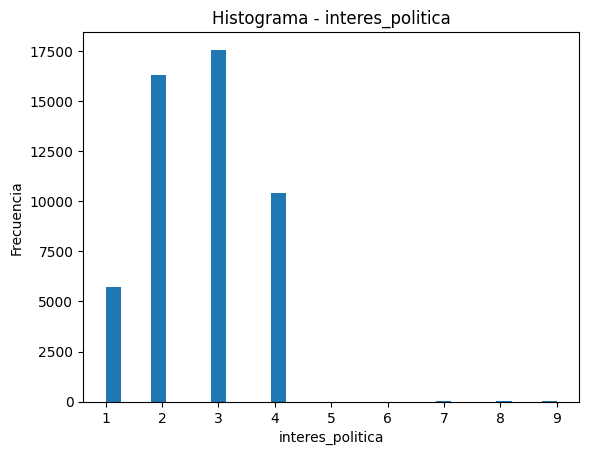

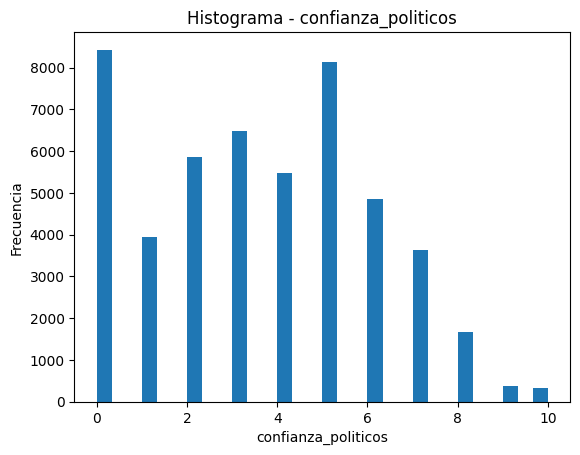

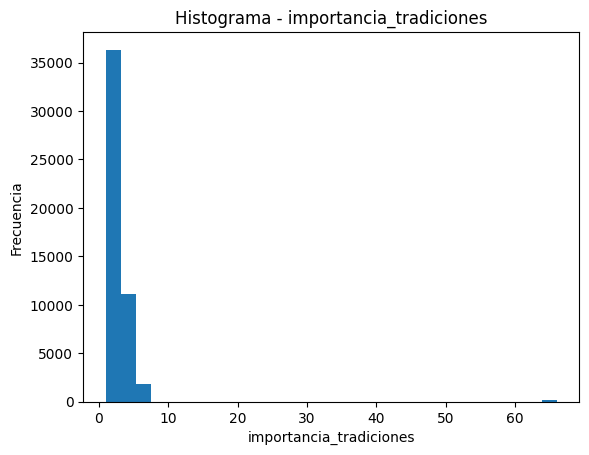

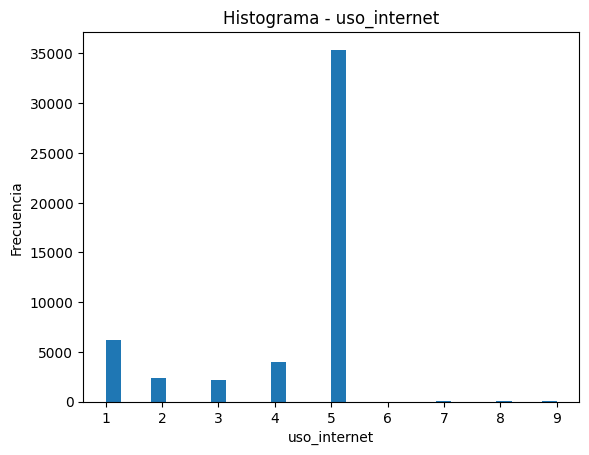

In [18]:
for col in numeric_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histograma - {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

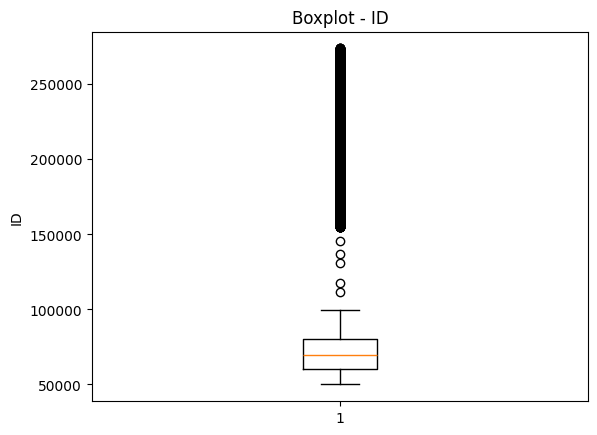

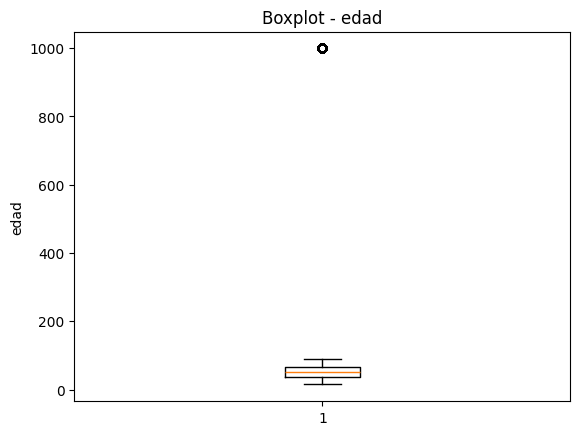

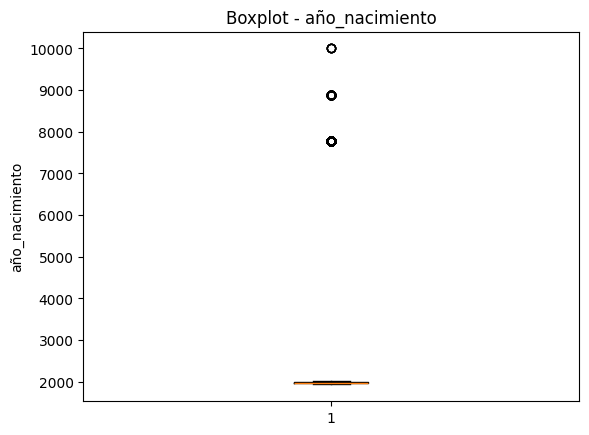

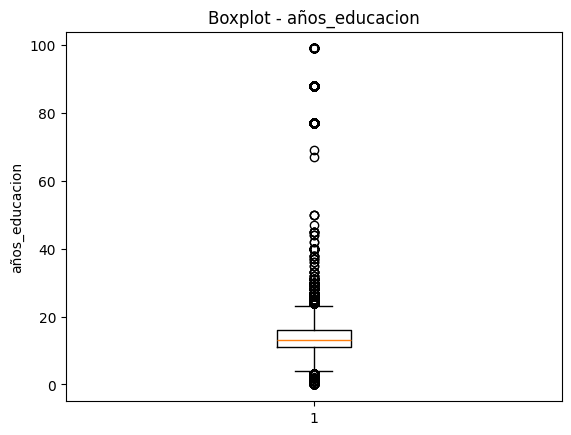

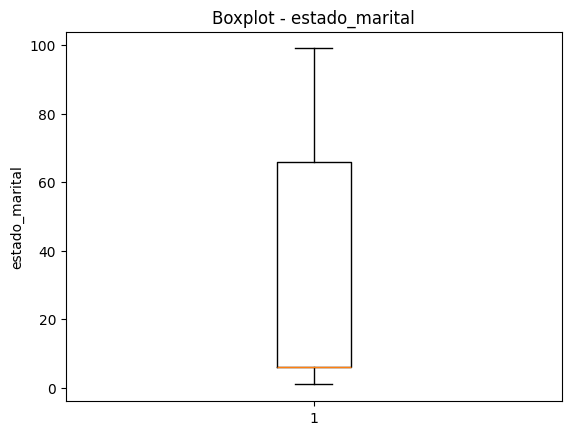

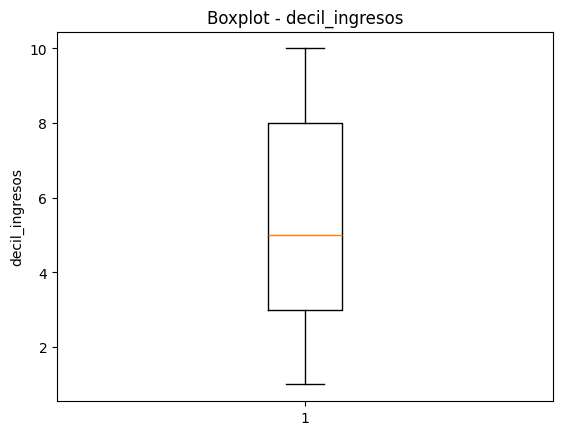

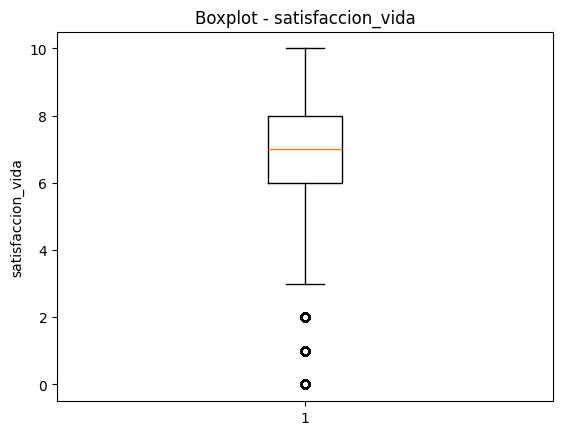

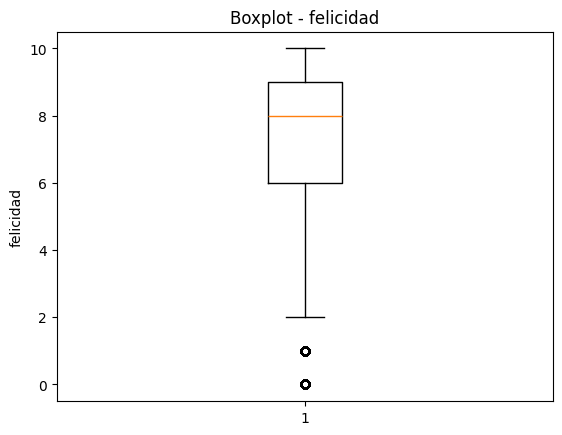

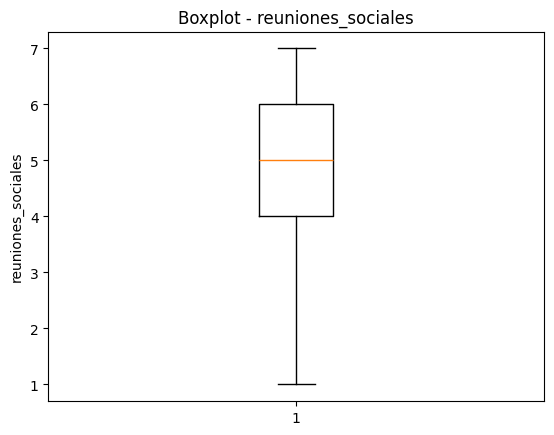

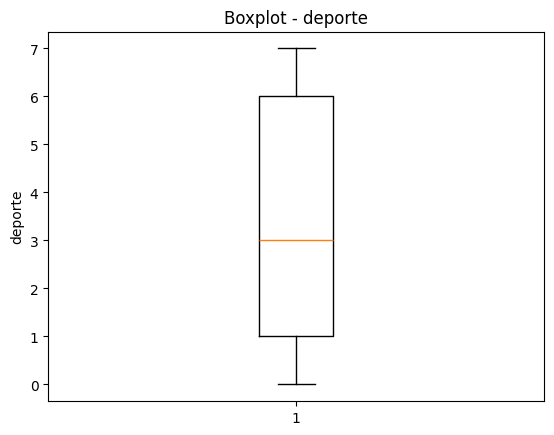

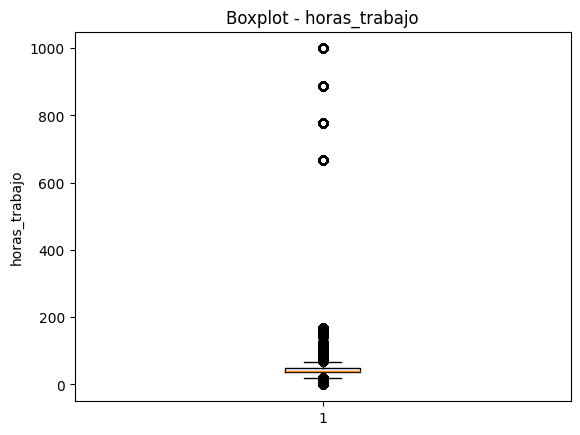

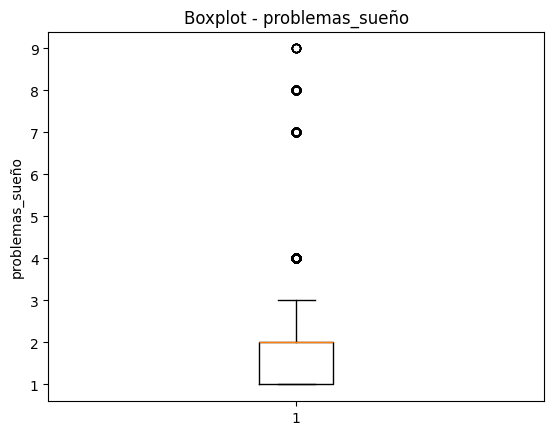

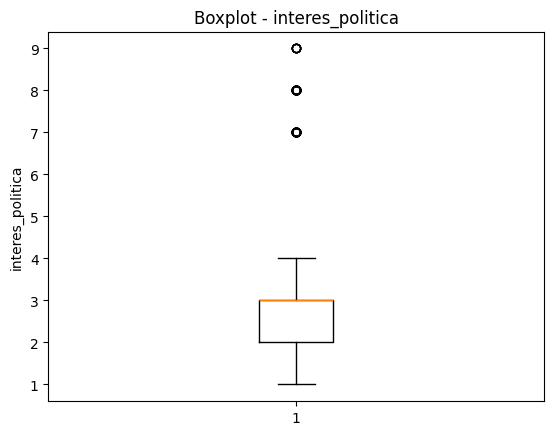

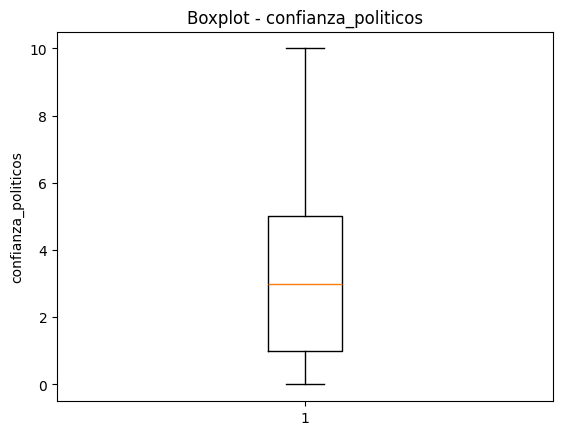

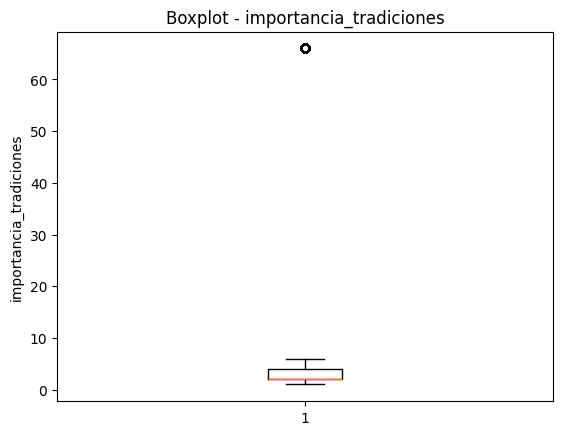

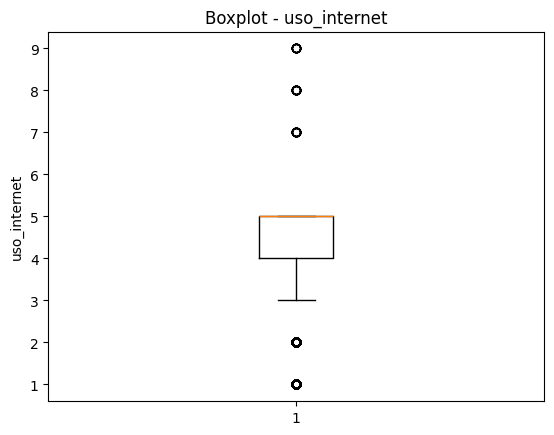

In [19]:
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot - {col}")
    plt.ylabel(col)
    plt.show()

In [20]:
object_cols = df.select_dtypes(include="object").columns

/var/folders/4w/6nrn1lr91snggw8k807rmyz40000gn/T/ipykernel_11160/4126431653.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  object_cols = df.select_dtypes(include="object").columns


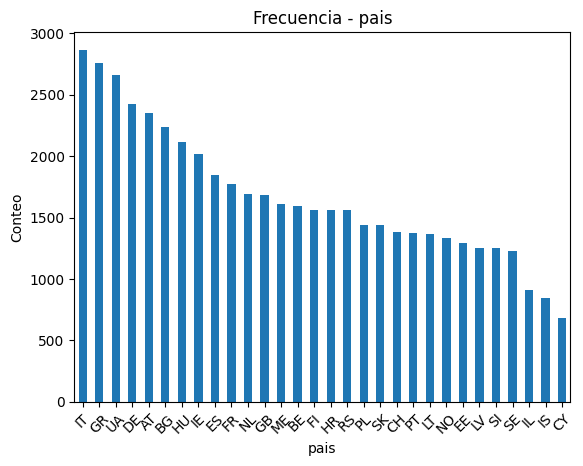

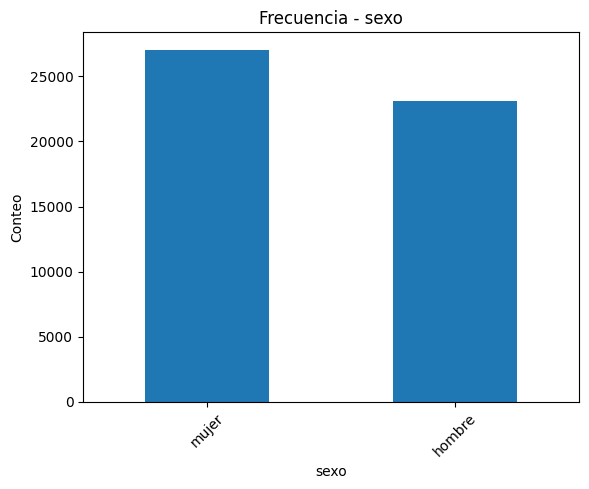

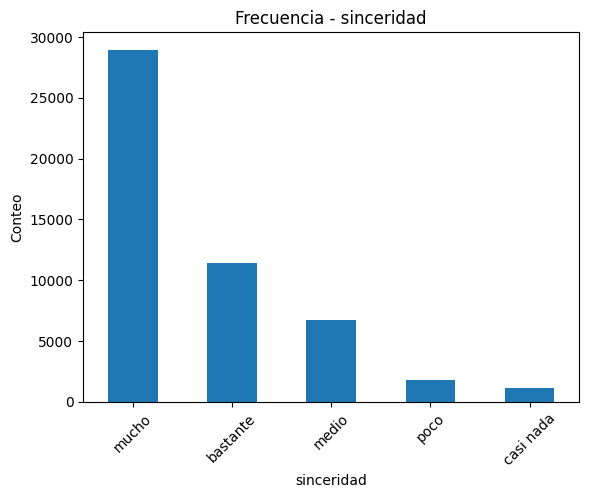

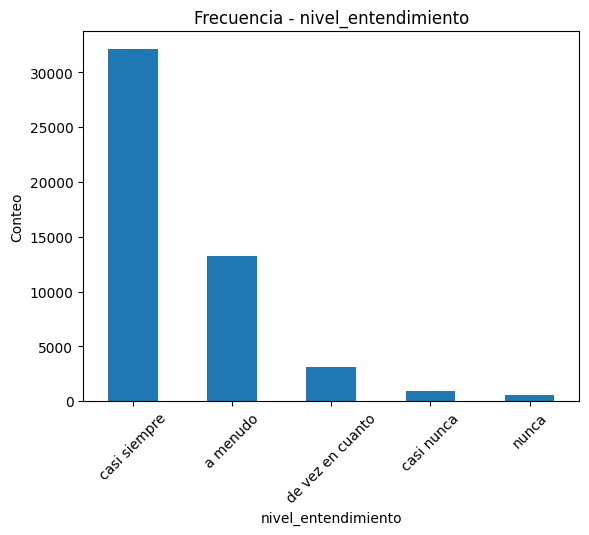

In [21]:
for col in object_cols:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Frecuencia - {col}")
    plt.xlabel(col)
    plt.ylabel("Conteo")
    plt.xticks(rotation=45)
    plt.show()

### Matriz de correlación

In [23]:
matrix = df[numeric_cols]
corr_matrix = matrix.corr()
corr_matrix

,ID,edad,año_nacimiento,años_educacion,estado_marital,decil_ingresos,satisfaccion_vida,felicidad,reuniones_sociales,deporte,horas_trabajo,problemas_sueño,interes_politica,confianza_politicos,importancia_tradiciones,uso_internet
ID,1.000000,0.010673,0.013917,0.052706,0.003234,-0.175637,-0.172978,-0.128960,-0.035254,0.026895,0.107423,0.079403,0.053686,-0.088094,0.003322,-0.013998
edad,0.010673,1.000000,0.964913,0.081975,0.052380,-0.087785,-0.031108,-0.036066,-0.063314,-0.038140,0.041151,0.055357,-0.010482,-0.017749,0.006545,-0.123227
año_nacimiento,0.013917,0.964913,1.000000,0.103348,-0.000151,-0.009744,-0.015304,-0.011417,-0.012186,-0.005353,0.059725,0.036828,0.023603,-0.012017,0.025838,0.002227
años_educacion,0.052706,0.081975,0.103348,1.000000,0.012573,0.128276,0.009183,0.009901,0.020000,0.036805,0.076221,0.015928,-0.058742,0.028309,0.037961,0.104403
estado_marital,0.003234,0.052380,-0.000151,0.012573,1.000000,0.225926,0.089262,0.119578,-0.083935,-0.025291,-0.092242,-0.022823,-0.083506,0.015748,-0.041568,-0.001236
decil_ingresos,-0.175637,-0.087785,-0.009744,0.128276,0.225926,1.000000,0.254446,0.238584,0.118704,0.050920,-0.124498,-0.132862,-0.157448,0.136289,0.015495,0.333577
satisfaccion_vida,-0.172978,-0.031108,-0.015304,0.009183,0.089262,0.254446,1.000000,0.679176,0.203959,0.129580,-0.073722,-0.206903,-0.113949,0.229738,-0.016873,0.166255
felicidad,-0.128960,-0.036066,-0.011417,0.009901,0.119578,0.238584,0.679176,1.000000,0.227460,0.149918,-0.083610,-0.211887,-0.100122,0.187577,-0.019385,0.197621
reuniones_sociales,-0.035254,-0.063314,-0.012186,0.020000,-0.083935,0.118704,0.203959,0.227460,1.000000,0.161616,0.000779,-0.102643,-0.052135,0.061829,0.017888,0.193446
deporte,0.026895,-0.038140,-0.005353,0.036805,-0.025291,0.050920,0.129580,0.149918,0.161616,1.000000,-0.074953,-0.066045,-0.095471,0.037183,0.024777,0.184703


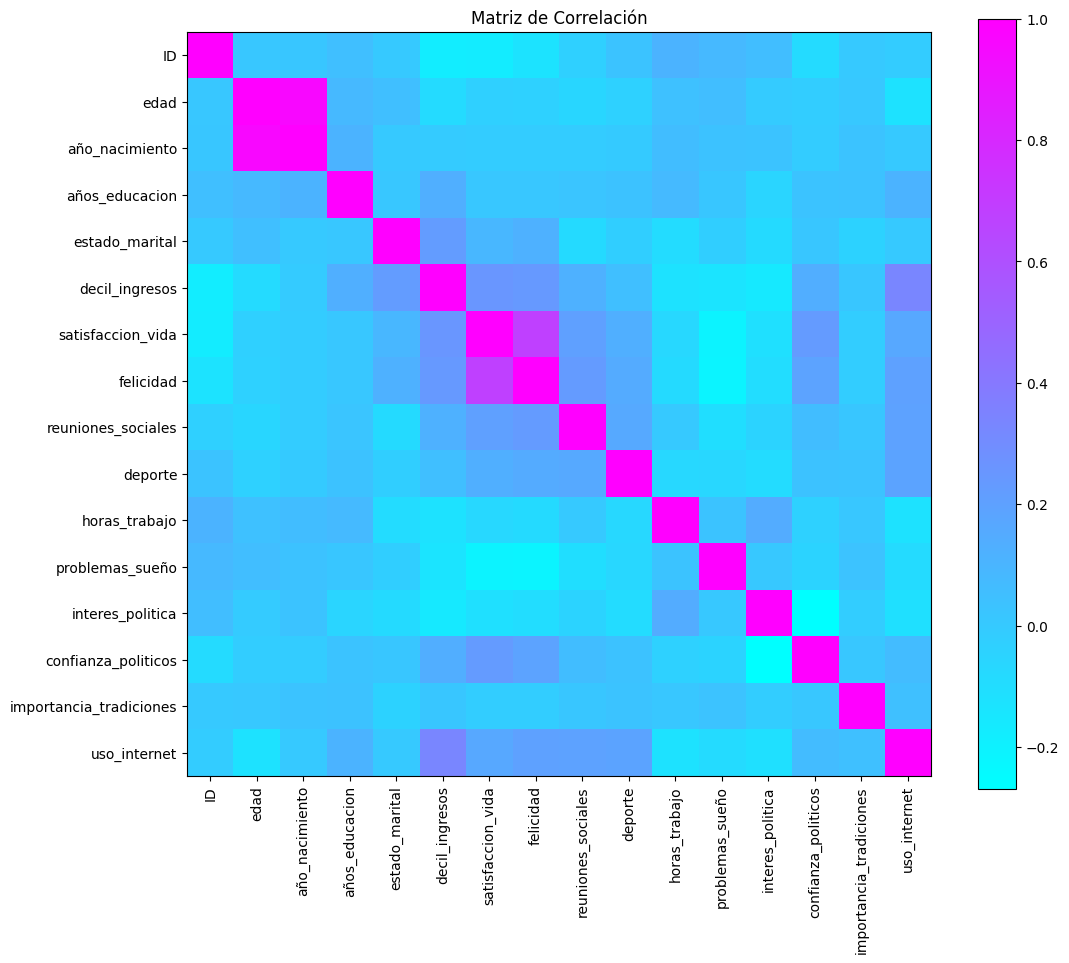

In [25]:
plt.figure(figsize=(12,10))
plt.imshow(corr_matrix, cmap="cool")
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Matriz de Correlación")
plt.show()

### Nulos

In [29]:
df.isna().sum().sort_values(ascending=False)

decil_ingresos             10428
confianza_politicos          950
deporte                      783
importancia_tradiciones      655
satisfaccion_vida            364
felicidad                    219
nivel_entendimiento          207
sinceridad                   149
reuniones_sociales           135
horas_trabajo                 11
pais                           0
ID                             0
año_nacimiento                 0
edad                           0
estado_marital                 0
sexo                           0
años_educacion                 0
problemas_sueño                0
interes_politica               0
uso_internet                   0
dtype: int64

Aunque no son todos los que hay, ya que tenemos columnas con caracteres raros (99, 999 etc) que seguramente son nulos también.

In [30]:
(df.isna().mean() * 100).sort_values(ascending=False)

decil_ingresos             20.807726
confianza_politicos         1.895602
deporte                     1.562375
importancia_tradiciones     1.306968
satisfaccion_vida           0.726315
felicidad                   0.436986
nivel_entendimiento         0.413042
sinceridad                  0.297310
reuniones_sociales          0.269375
horas_trabajo               0.021949
pais                        0.000000
ID                          0.000000
año_nacimiento              0.000000
edad                        0.000000
estado_marital              0.000000
sexo                        0.000000
años_educacion              0.000000
problemas_sueño             0.000000
interes_politica            0.000000
uso_internet                0.000000
dtype: float64

La columna que más nulos tiene es de ingresos, lo cual parece lógico, puesto que a la gente le suele ser incómodo todas estos temas.